<a href="https://colab.research.google.com/github/LCaravaggio/ML_conPython/blob/main/Reducci%C3%B3n_de_la_Dimensionalidad.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Librerías

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import umap.umap_ as umap  # librería UMAP

# 2. Dataset de ejemplo: Wine

In [4]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv"
df = pd.read_csv(url, sep=';')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


# 3. Seleccionamos solo variables numéricas

In [5]:
X = df.select_dtypes(include=[np.number])

# 4. Estandarizamos (muy importante para PCA y UMAP)

In [6]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 5. PCA a 2 dimensiones

In [7]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# 6. UMAP a 2 dimensiones

In [8]:
reducer = umap.UMAP(n_components=2, random_state=42)
X_umap = reducer.fit_transform(X_scaled)

/usr/local/lib/python3.12/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


# 7. Gráficos comparativos

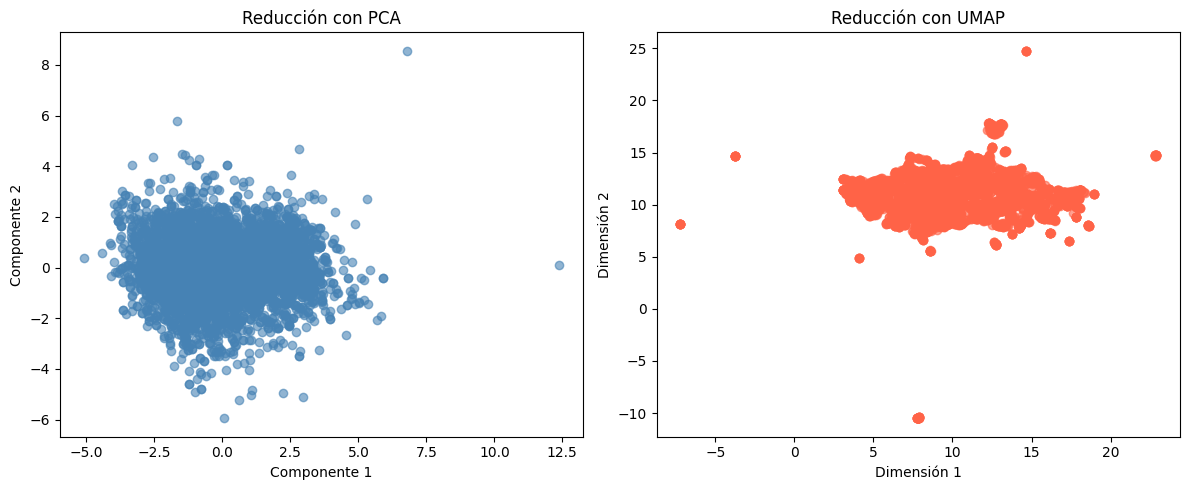

In [9]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.scatter(X_pca[:,0], X_pca[:,1], alpha=0.6, c='steelblue')
plt.title("Reducción con PCA")
plt.xlabel("Componente 1")
plt.ylabel("Componente 2")

plt.subplot(1,2,2)
plt.scatter(X_umap[:,0], X_umap[:,1], alpha=0.6, c='tomato')
plt.title("Reducción con UMAP")
plt.xlabel("Dimensión 1")
plt.ylabel("Dimensión 2")

plt.tight_layout()
plt.show()


# 8. Varianza explicada por PCA

In [10]:
print("Varianza explicada por PCA:", pca.explained_variance_ratio_)

Varianza explicada por PCA: [0.27888907 0.13217419]
